In [1]:
from __future__ import print_function

#Decision Trees

##Applying Decision Trees

###1: The dataset

In this mission, we'll learn about when to use decision trees, and how to use them most effectively.

The data is from the 1994 Census, and contains information on an individual's marital status, age, type of work, and more. The target column, high_income, is if they make less than or equal to 50k a year (0), or more than 50k a year (1).

In [2]:
import pandas

# Set index_col to False to avoid pandas thinking that the first column is row indexes (it's age).
income = pandas.read_csv("data/income.csv", header=False, index_col=False)
income.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
from sklearn import preprocessing

#print("income.dtypes:\n", income.dtypes)

for column in income:
    if income[column].dtypes == "object":
        income[column] = income[column].astype("category")
        income[column] = income[column].cat.codes
        
income.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


###2: Using decision trees with scikit-learn

We can use the <a href = "http://scikit-learn.org/">scikit-learn</a> package to fit a decision tree. The interface is very similar to other algorithms we've fit in the past.

We use the <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">DecisionTreeClassifier</a> class for classification problems, and <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor">DecisionTreeRegressor</a> for regression problems. Both of these classes are in the sklearn.tree package.

In this case, we're predicting a binary outcome, so we'll use a classifier.

The first step is to train the classifier on the data. We'll use the fit method on a classifier to do this.

####Instructions

Fit clf to the income data. Pass in income[columns] to only use the named columns as predictors. The target is the high_income column.

In [4]:
from sklearn.tree import DecisionTreeClassifier

# A list of columns to train with.
# All columns have been converted to numeric.
columns = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]

# Instantiate the classifier.
# Set random_state to 1 to keep results consistent.
clf = DecisionTreeClassifier(random_state=1)

# The variable income is loaded, and contains all the income data.
clf.fit(income[columns], income["high_income"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best')

###3: Splitting the data into train and test sets

Now that we've fit a model, we can make predictions. We'll want to split our data into training and testing sets first. If we don't, we'll be making predictions on the same data that we train our algorithm with. This leads to overfitting, and will make our error appear lower than it is.

We covered overfitting in more depth earlier, but a simple explanation is that if you memorize how to perform 3 specific addition problems (2+2, 3+6, 3+3), you'll get those specific problems correct every time. On the other hand, if you're asked 4+4, you won't know how to do it, because you don't know the rules of addition.

If you learn the rules of addition, you'll sometimes get problems wrong (3443343434+24344343 can be hard to do mentally), but you'll be able to do any problem, and you'll get most of them right. Overfitting is the first example, where you memorize the details of the training set, but are unable to generalize to new examples that you're asked to make predictions on.

We can avoid overfitting by always making predictions and evaluating error on data that our algorithm hasn't been trained with. This will show us when we're overfitting by giving us a realistic error on data that the algorithm hasn't seen before.

We can split the data by shuffling the order of the dataframe, then selecting certain rows to be in the training set, and certain rows to be in the testing set.

In this case, we'll make 80% of our rows training data, and the rest testing data.

####Instructions

All the rows in income with a position up to train_max_row (but not including it) will be part of the training set. Make a new dataframe called train containing all of these rows.

Make a dataframe called test containing all of the rows with a position greater than or equal to train_max_row.

To select elements by position, use the .iloc[] method on dataframes. income.iloc[0:10] will select the first 10 rows of the dataframe (from position 0 up to, but not including, position 10).

In [5]:
import numpy
import math

# Set a random seed so the shuffle is the same every time.
numpy.random.seed(1)

# Shuffle the rows.  This first permutes the index randomly using numpy.random.permutation.
# Then, it reindexes the dataframe with this.
# The net effect is to put the rows into random order.
income = income.reindex(numpy.random.permutation(income.index))

train_max_row = math.floor(income.shape[0] * .8)
train = income.iloc[:train_max_row]
test = income.iloc[train_max_row:]

###4: Evaluating error

While there are many methods to evaluate error with classification, we'll use <a href = "https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_curve">AUC</a>, which we covered extensively earlier in the machine learning material. AUC ranges from 0 to 1, and is ideal for binary classification. The higher the AUC, the more accurate our predictions.

We can compute AUC with the <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score">roc_auc_score</a> function in sklearn.metrics. This will take in two arrays of predictions, and return the AUC between them.

####Instructions

Compute the AUC between predictions and the high_income column of test. Assign the result to error.

In [6]:
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[columns], train["high_income"])

predictions = clf.predict(test[columns])
print("predictions:", predictions)

error = roc_auc_score(predictions, test["high_income"])
print("error:", error)

predictions: [0 0 0 ..., 0 1 1]
error: 0.70539054051


###5: Compute error on the training set

The AUC for the predictions on the testing set is about .7. Let's compare this against the AUC for predictions on the training set to see if the model is overfitting.

It's normal for the model to predict the training set better than the testing set. After all, it has full knowledge of that data and the outcomes. However, if the AUC between training set predictions and actual values is significantly higher than the AUC between test set predictions and actual values, it's a sign that the model may be overfitting.

####Instructions

Print out the AUC score between predictions and the high_income column of train.

In [7]:
predictions = clf.predict(train[columns])
roc_auc = roc_auc_score(predictions, train["high_income"])

print("roc_auc:", roc_auc)

roc_auc: 0.973887981629


###6: Decision tree overfitting

Our AUC on the training set was .973. The AUC on the test set was .705. There's no hard and fast rule on when overfitting is happening, but our model is predicting the training set much better than it's predicting the test set. Splitting the data into training and testing sets doesn't prevent overfitting -- it just helps us detect it and fix it.

Based on our AUC measurements, it appears that we are in fact overfitting. Let's look a little more into why decision trees might overfit.

In the last mission, we looked at this data:

    high_income    age    marital_status
    0              20     0
    0              60     2
    0              40     1
    1              25     1
    1              35     2
    1              55     1

Here's the full diagram for the decision tree we can build from the above data:

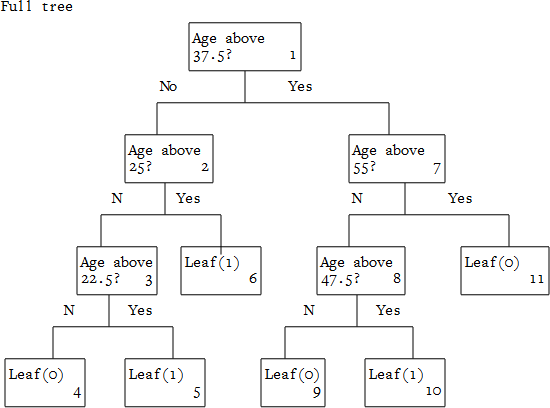

In [8]:
from IPython.display import Image

Image(filename="full_tree.png") 

This tree perfectly predicts all of our values. It can always get a right answer on the training set. This is equivalent to memorizing the rules of addition. We've built our tree in such a way that it can perfectly predict the training set -- but, the way the tree has been constructed doesn't make sense when we step back.

The tree above is saying, if you're under 22.5 years old, you have low income. If you're 22.5 - 37.5, high income. If you're 37.5 - 47.5, low income. If you're 47.5 to 55, high income. If you're above 55, low income. These rules are very specific to the training set.

Think about the problem with a real-world lens. Does it make sense to predict that someone who is 20 is low income, someone who is 25 is high income, and someone who is 40 is low income? Intuitively, we know that people who are younger probably make less, people who are middle aged make more, and people who have retired make less.

Our tree has created so many age-based splits in an attempt to perfectly predict everyone's income that each split is effectively meaningless.

Here's a tree that matches up with our intuition better:

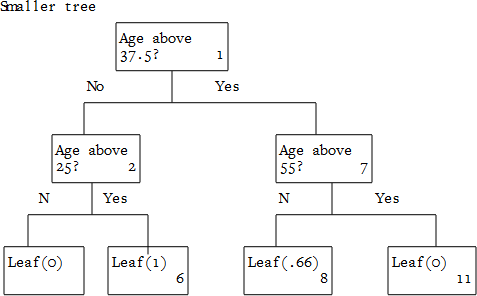

In [9]:
from IPython.display import Image

Image(filename="smaller_tree.png") 

All we've done is "pruned" the tree, and removed some of the lower leaves. We've made some of the higher up nodes into leaves instead.

The tree above makes more intuitive sense. If you're under 25, we predict low income. If you're between 25 and 55, we predict high income (the .66 rounds up to 1). If you're above 55, we predict low income.

This actually has lower accuracy on our training set, but it will generalize better to new examples, because it matches reality better.

Trees overfit when they have too much depth, and make overly complex rules that match the training data, but aren't able to generalize well to new data.

This may seem to be a strange principle at first, but the more depth a tree has, typically the worse it performs on new data.

###7: Building a shallower tree

There are three main ways to combat overfitting:

- "Prune" the tree after building to remove unneeded leaves.
- Use ensembling to blend the predictions of many trees.
- Restrict the depth of the tree while you're building it.

We'll explore all of these, but we'll look at the third method first.

By controlling how deep the tree can go while we build it, we keep the rules more general than they would be otherwise. This prevents the tree from overfitting.

We can restrict how deep the tree is built with a few parameters when we initialize the DecisionTreeClassifier class:

- max_depth -- this globally restricts how deep the tree can go.
- min_samples_split -- The minimum number of rows needed in a node before it can be split. For example, if this is set to 2, then nodes with 2 rows won't be split, and will become leaves instead.
- min_samples_leaf -- the minimum number of rows that a leaf must have.
- min_weight_fraction_leaf -- the fraction of input rows that are required to be at a leaf.
- max_leaf_nodes -- the maximum number of total leaves. This will cap the count of leaf nodes as the tree is being built.

As you can see, some of these parameters don't make sense together. Having max_depth and max_leaf_nodes together isn't allowed.

Now that we know what to tweak, let's improve our model.

####Instructions

Set min_samples_split to 5 when creating the DecisionTreeClassifier. Make predictions on the training set, and compute AUC. Assign it to train_auc.

Make predictions on the test set, and compute AUC. Assign it to test_auc.

In [10]:
clf = DecisionTreeClassifier(min_samples_split=5, random_state=1)
clf.fit(train[columns], train["high_income"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(predictions, test["high_income"])

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train_predictions, train["high_income"])

print("test_auc:", test_auc)
print("train_auc:", train_auc)

test_auc: 0.713209385338
train_auc: 0.934117616841


In [11]:
clf = DecisionTreeClassifier(random_state=1, min_samples_split=25, max_depth=4)
clf.fit(train[columns], train["high_income"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(predictions, test["high_income"])

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train_predictions, train["high_income"])

print("test_auc:", test_auc)
print("train_auc:", train_auc)

test_auc: 0.796980156519
train_auc: 0.790555914131


###9: Tweaking the depth

We just improved AUC again. The test set AUC is .796, and the training set AUC is .790. We aren't overfitting anymore, as both AUCs are about the same.

Let's tweak the parameters more aggressively, and see what happens.

####Instructions

Set max_depth to 2 and min_samples_split to 100 when creating the DecisionTreeClassifier. Make predictions on the training set, and compute AUC. Assign it to train_auc.

Make predictions on the test set, and compute AUC. Assign it to test_auc.

In [12]:
clf = DecisionTreeClassifier(random_state=1, min_samples_split=100, max_depth=2)
clf.fit(train[columns], train["high_income"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(predictions, test["high_income"])

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train_predictions, train["high_income"])

print("test_auc:", test_auc)
print("train_auc:", train_auc)

test_auc: 0.774502262504
train_auc: 0.775022084636


###10: Underfitting

Our accuracy went down in the past screen relative to the screen before. This is because we're now <a href = "http://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted">underfitting</a>. Underfitting is what happens when our model is too simple to actually explain the relations between the variables.

Let's go back to our tree diagram to explain underfitting.

Here's the data:

    high_income    age    marital_status
    0              20     0
    0              60     2
    0              40     1
    1              25     1
    1              35     2
    1              55     1

And here's the "right fit" tree. This tree explains the data properly, without overfitting:

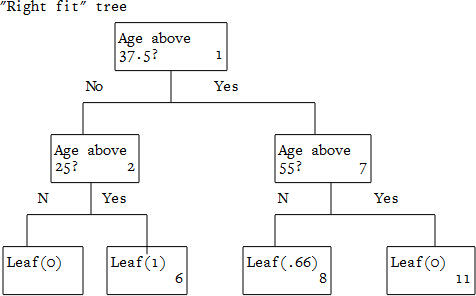

In [13]:
from IPython.display import Image

Image(filename="right_tree.png") 

Let's trim this tree even more to show what happens when the model isn't complex enough to explain the data:

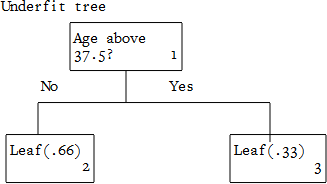

In [14]:
from IPython.display import Image

Image(filename="underfit_tree.png") 

In this model, anybody under 37.5 will be predicted to have high income (.66 rounds up), and anyone over 37.5 will be predicted to have low income (.33 rounds down). This model is too simple to model reality -- which is younger people make less, middle-aged people make more, and elderly people make less.

Thus, this tree underfits the data and will have lower accuracy than the properly fit version.

11: The bias-variance tradeoff

By artificially restricting the depth of our tree, we prevent it from creating a complex enough model to correctly categorize some of the rows. If we don't perform the artificial restrictions, the tree becomes too complex, and fits quirks in the data that only exist in the training set, but don't generalize to new data.

This is known as the <a href = "https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff">bias-variance tradeoff</a>. If we take a random sample of training data and create many models, if the predictions of the models for the same row are far apart from each other, we have high variance. If we take a random sample of training data, and create many models, and the predictions of the models for the same row are close together, but far from the actual value, then we have high bias.

High bias can cause underfitting -- if a model is consistently failing to predict the correct value, it may be that it is too simple to actually model the data.

High variance can cause overfitting -- if a model is very susceptible to small changes in the input data, and changes its predictions massively, then it is likely fitting itself to quirks in the training data, and not making a generalizable model.

It's called the bias-variance tradeoff because decreasing one will usually increase the other. This is a limitation of all machine learning algorithms. If you want to read more about the tradeoff, you can look <a href = "http://scott.fortmann-roe.com/docs/BiasVariance.html">here</a>.

In general, decision trees suffer from high variance. The whole structure of a decision tree can change if you make a minor alteration to its training data. By restricting the depth of the tree, we increase the bias and decrease the variance. If we restrict the depth too much, we increase bias to the point where it will underfit.

Generally, you'll need to use your intuition and manually tweak parameters to get the "right" fit.

###12: Exploring decision tree variance

We can induce variance and see what happens with a decision tree. To add noise, we'll just add a column of random values. A model with high variance (like a decision tree) will pick up on this noise, and overfit to it. This is because models with high variance are very sensitive to small changes in input data.

####Instructions

Fit the classifier to the training data.

Make predictions on the training set, and compute AUC. Assign it to train_auc.

Make predictions on the test set, and compute AUC. Assign it to test_auc.

In [15]:
numpy.random.seed(1)

# Generate a column with random numbers from 0 to 4.
income["noise"] = numpy.random.randint(4, size=income.shape[0])

# Adjust columns to include the noise column.
columns = ["noise", "age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]

# Make new train and test sets.
train_max_row = math.floor(income.shape[0] * .8)
train = income.iloc[:train_max_row]
test = income.iloc[train_max_row:]

# Initialize the classifier.
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[columns], train["high_income"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(predictions, test["high_income"])

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train_predictions, train["high_income"])

print("test_auc:", test_auc)
print("train_auc:", train_auc)

test_auc: 0.697589214354
train_auc: 0.989559993763


###13: Pruning

As you can see above, the random noise column causes significant overfitting. Our test set accuracy decreases to .697, and our training set accuracy increases to .989.

One way to prevent overfitting that we tried before was to prevent the tree from growing beyond a certain depth. Another technique is called <a href = "https://en.wikipedia.org/wiki/Pruning_(decision_trees)">pruning</a>. Pruning involves building a full tree, and then removing the leaves that don't add to prediction accuracy. Pruning prevents a model from becoming overly complex, and can make a simpler model with higher accuracy on the testing set.

Pruning is less commonly used than parameter optimization (like we just did), and ensembling. That's not to say that it isn't an important technique, and we'll cover it in more depth down the line.

###14: When to use decision trees

Let's go over the main advantages and disadvantages of decision trees. The main advantages of decision trees are:

- Easy to interpret
- Relatively fast to fit and make predictions
- Able to handle multiple types of data
- Can pick up nonlinearities in data, and are usually fairly accurate

The main disadvantage is a tendency to overfit.

In tasks where it's important to be able to interpret and convey why the algorithm is doing what it's doing, decision trees are a good choice.

The most powerful way to reduce decision tree overfitting is to create ensembles of trees. A popular algorithm to do this is called <a href = "https://en.wikipedia.org/wiki/Random_forest">random forest</a>. We'll cover random forests in the next mission. In cases where prediction accuracy is the most important consideration, random forests usually perform better.

In the next mission, we'll explore the random forest algorithm in more depth.